変数同士の関係性を見出すことをしやすくするために、"Students Test Data"という試験の結果（サンプルプログラムと同じジャンル）のデータセットを用いた。

In [1]:
import numpy as np
import pandas as pd

# Jupyter Notebookの出力を小数点以下3桁に抑える
%precision 3
# Dataframeの出力を小数点以下3桁に抑える
#pd.set_option('precision', 3)
pd.options.display.precision = 3  # pandas 1.4 から

In [4]:
input_data = pd.read_csv("Private_data.csv")
input_data.head(10)

,Unnamed: 0,NAME OF THE STUDENT,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
0,0,Camila Wood,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000
1,1,Alexander Thompson,"Stanford University, USA",B.Com,Financial Services,5th,Finance,50,50,100,2,0.993
2,2,Liam Taylor,"Harvard University, USA",B.Com,Accounting Analytics,5th,BA,50,50,100,3,0.987
3,3,Evelyn Jenkins,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980
4,4,Michael Jackson,"Harvard University, USA",MBA,International Business,3rd,IB,50,49,99,5,0.974
5,5,Chloe Moore,"Stanford University, USA",B.Com,Honours,5th,Finance,50,48,98,6,0.967
6,6,Nicholas Clark,"Harvard University, USA",MBA,International Business,3rd,IB,49,49,98,7,0.960
7,7,Olivia Richardson,"Stanford University, USA",BBA,International Business,5th,IB,50,47,97,8,0.954
8,8,Aiden Rivera,"Stanford University, USA",B.Com,Honours,5th,Finance,50,47,97,9,0.947
9,9,Harper Turner,"Harvard University, USA",MBA,International Business,3rd,IB,49,48,97,10,0.940


In [5]:
df = pd.read_csv('Private_data.csv',
                 index_col='Unnamed: 0')

In [8]:
GE_scores = np.array(df['GENERAL MANAGEMENT SCORE (OUT of 50)'])[:10]
DO_scores = np.array(df['Domain Specific SCORE (OUT 50)'])[:10]

scores_df = pd.DataFrame({'GENERAL MANAGEMENT SCORE (OUT of 50)':GE_scores,
                          'Domain Specific SCORE (OUT 50)':DO_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='Student'))
scores_df

,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50)
Student,,
A,50,50
B,50,50
C,50,50
D,49,50
E,50,49
F,50,48
G,49,49
H,50,47
I,50,47


共分散

In [9]:
summary_df = scores_df.copy()
summary_df['GENERAL MANAGEMENT SCOREの偏差'] =\
    summary_df['GENERAL MANAGEMENT SCORE (OUT of 50)'] - summary_df['GENERAL MANAGEMENT SCORE (OUT of 50)'].mean()
summary_df['Domain Specific SCOREの偏差'] =\
    summary_df['Domain Specific SCORE (OUT 50)'] - summary_df['Domain Specific SCORE (OUT 50)'].mean()
summary_df['偏差同士の積'] =\
    summary_df['GENERAL MANAGEMENT SCOREの偏差'] * summary_df['Domain Specific SCOREの偏差']
summary_df

,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),GENERAL MANAGEMENT SCOREの偏差,Domain Specific SCOREの偏差,偏差同士の積
Student,,,,,
A,50,50,0.3,1.2,0.36
B,50,50,0.3,1.2,0.36
C,50,50,0.3,1.2,0.36
D,49,50,-0.7,1.2,-0.84
E,50,49,0.3,0.2,0.06
F,50,48,0.3,-0.8,-0.24
G,49,49,-0.7,0.2,-0.14
H,50,47,0.3,-1.8,-0.54
I,50,47,0.3,-1.8,-0.54


In [10]:
summary_df['偏差同士の積'].mean()

np.float64(-0.06000000000000001)

In [11]:
cov_mat = np.cov(GE_scores, DO_scores, ddof=0)
cov_mat

array([[ 0.21, -0.06],
       [-0.06,  1.36]])

In [12]:
cov_mat[0, 1], cov_mat[1, 0]

(np.float64(-0.06000000000000001), np.float64(-0.06000000000000001))

In [13]:
cov_mat[0, 0], cov_mat[1, 1]

(np.float64(0.20999999999999996), np.float64(1.36))

In [14]:
np.var(GE_scores, ddof=0), np.var(DO_scores, ddof=0)

(np.float64(0.21000000000000002), np.float64(1.3599999999999999))

相関係数

In [15]:
np.cov(GE_scores, DO_scores, ddof=0)[0, 1] /\
    (np.std(GE_scores) * np.std(DO_scores))

np.float64(-0.11227217828476797)

In [16]:
np.corrcoef(GE_scores, DO_scores)

array([[ 1.   , -0.112],
       [-0.112,  1.   ]])

In [17]:
scores_df.corr()

,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50)
GENERAL MANAGEMENT SCORE (OUT of 50),1.000,-0.112
Domain Specific SCORE (OUT 50),-0.112,1.000


相関図（散布図）

In [18]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b40fc930431721f6a51224fe8b70fa0fefaba68c3867609ca297250024a6310b
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

#plt.rcParams['font.family'] = 'MS Gothic' # 日本語対応

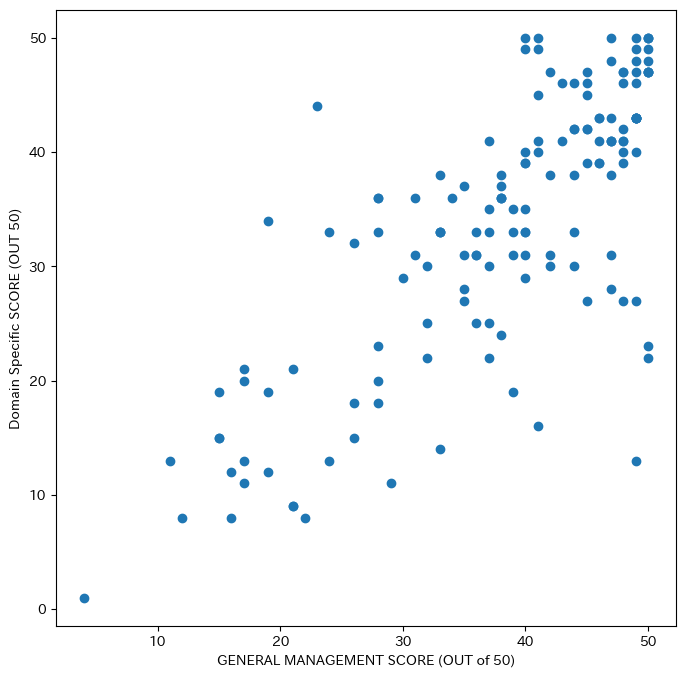

In [20]:
GENERAL_scores = np.array(df['GENERAL MANAGEMENT SCORE (OUT of 50)'])
Domain_scores = np.array(df['Domain Specific SCORE (OUT 50)'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 散布図
ax.scatter(GENERAL_scores, Domain_scores)
ax.set_xlabel('GENERAL MANAGEMENT SCORE (OUT of 50)')
ax.set_ylabel('Domain Specific SCORE (OUT 50)')

plt.show()

回帰直線

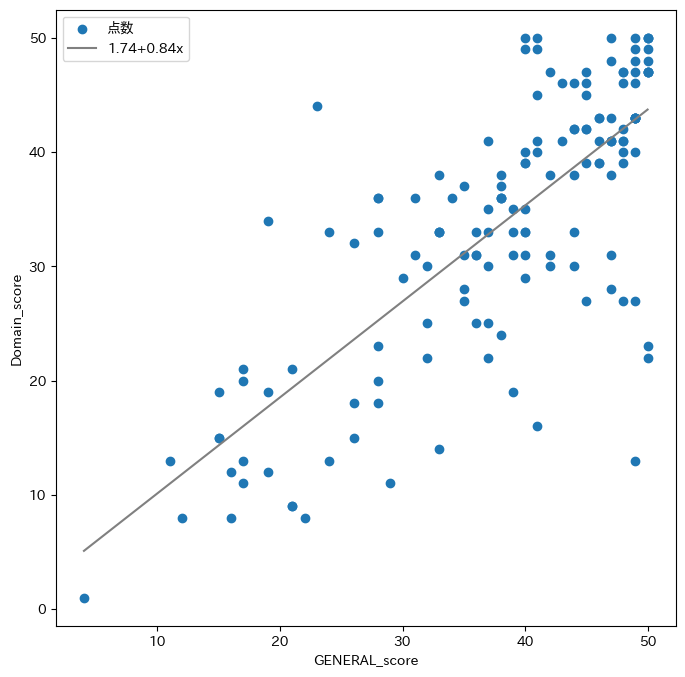

In [21]:
# 係数β_0とβ_1を求める
poly_fit = np.polyfit(GENERAL_scores, Domain_scores, 1)
# β_0+β_1 xを返す関数を作る
poly_1d = np.poly1d(poly_fit)
# 直線を描画するためのx座標を作る
xs = np.linspace(GENERAL_scores.min(), GENERAL_scores.max())
# xsに対応するy座標を求める
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(GENERAL_scores, Domain_scores, label='点数')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('GENERAL_score')
ax.set_ylabel('Domain_score')
# 凡例の表示
ax.legend(loc='upper left')

plt.show()

ヒートマップ

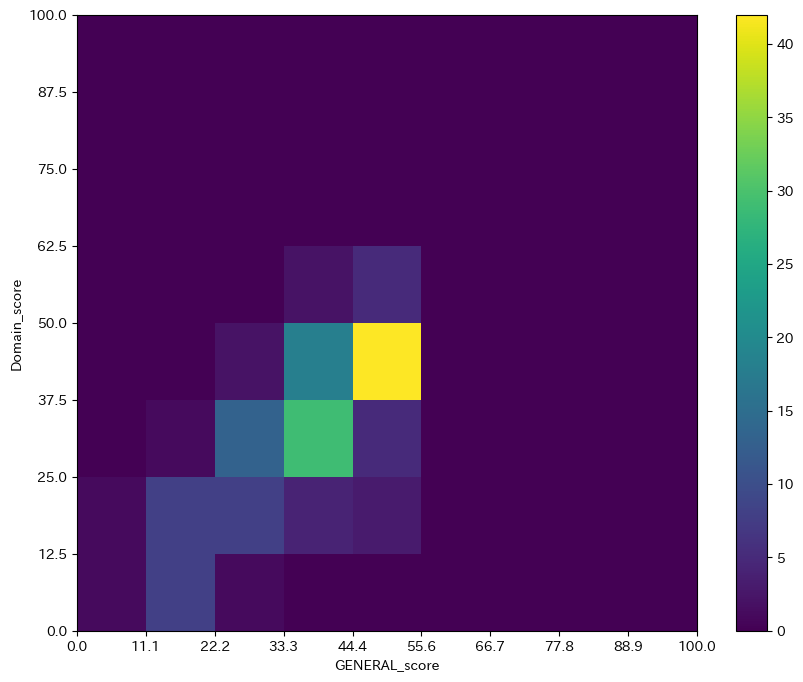

In [23]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(GENERAL_scores, Domain_scores,
              bins=[9, 8], range=[(0, 100), (0, 100)])
ax.set_xlabel('GENERAL_score')
ax.set_ylabel('Domain_score')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# カラーバーの表示
fig.colorbar(c[3], ax=ax)
plt.show()